### Problem Statement:

<b>a) Neural Network:</b> Vary the number of hidden layers, number of nodes per layer, Latent space vector size and analyse the quality of images generated by autoencoder.<br>
<b>b) Convolutional Neural Network:</b> Vary the number of Convolutional layers, filters, Latent space vector size and analyse the quality of images generated by autoencoder.<br>
Draw conclusions from the above study.

#### Import Libraries

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape, Conv2D, Conv2DTranspose, BatchNormalization, MaxPooling2D, UpSampling2D, concatenate 
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda
from tensorflow.keras.utils import to_categorical

#### Load Dataset

In [3]:
# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

#### Normalisation and Flatenning

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#### Dense Autoencoder Funtion

In [101]:
# Function to create and train Dense Autoencoder
def create_dense_autoencoder(hidden_layers, latent_dim):
    input_img = Input(shape=(784,))
    encoder = input_img
    for nodes in hidden_layers:
        encoder = Dense(nodes, activation='relu')(encoder)
    encoder = Dense(latent_dim, activation='relu')(encoder)

    decoder = encoder
    for nodes in reversed(hidden_layers):
        decoder = Dense(nodes, activation='relu')(decoder)
    decoder = Dense(784, activation='sigmoid')(decoder)

    autoencoder = Model(input_img, decoder)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(x_train_flat, x_train_flat, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_flat, x_test_flat))

    return autoencoder

#### CNN Autoencoder Function

In [17]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Function to create and train convolutional autoencoder
def custom_binary_crossentropy(y_true, y_pred):
    target_shape = tf.keras.backend.int_shape(y_pred)[1:-1]
    y_true_resized = tf.image.resize(y_true, target_shape, method='nearest')
    return tf.keras.losses.binary_crossentropy(y_true_resized, y_pred)

def create_autoencoder_conv(num_conv_layers, filters, latent_dim):
    # Encoder
    input_img = Input(shape=(28, 28, 1))
    x = input_img

    for i in range(num_conv_layers):
        x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)

    x = Flatten()(x)
    latent = Dense(latent_dim, activation='relu')(x)

    # Decoder
    x = Dense(7 * 7 * filters, activation='relu')(latent)
    x = Reshape((7, 7, filters))(x)

    for i in range(num_conv_layers - 1):
        x = Conv2DTranspose(filters, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)

    decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss=custom_binary_crossentropy)
    
    autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
    
    return autoencoder

#### Function to Generate Images

In [6]:
def generate_images(autoencoder, test_data, model_type='dense'):
    decoded_imgs = autoencoder.predict(test_data)

    if model_type == 'dense':
        decoded_imgs = decoded_imgs.reshape((len(decoded_imgs), 28, 28))

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_data[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

#### Varying the parameters

In [21]:
# Varying parameters for Dense Autoencoder
dense_hidden_layers_list = [[128, 64], [256, 128, 64], [512, 256, 128]]

# Varying Convolutional Layers, Filters, and Latent Dimension for CNN Autoencoder
num_conv_layers_list = [1, 2]
filters_list = [32, 64, 128]
latent_dim_list = [16,32, 64]


#### Experiment for Dense Autoencoder


Experiment: Dense Autoencoder - Hidden Layers: [128, 64], Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.2175 - val_loss: 0.1566
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1442 - val_loss: 0.1341
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1309 - val_loss: 0.1261
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1246 - val_loss: 0.1206
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1201 - val_loss: 0.1172
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1173 - val_loss: 0.1149
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1152 - val_loss: 0.1132
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1134 - val_loss: 0.1115
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1121 - val_loss: 0.1103
Epoch 10/10
313/3

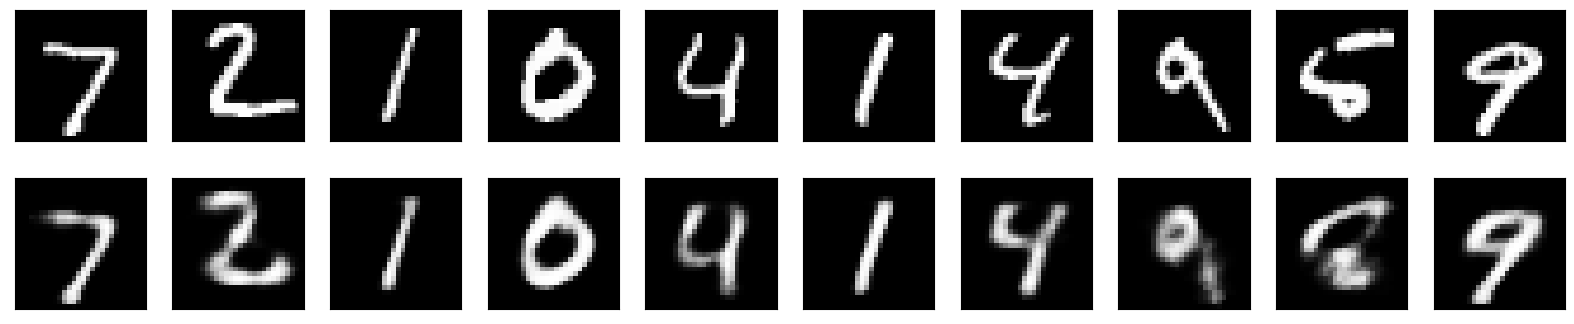


Experiment: Dense Autoencoder - Hidden Layers: [128, 64], Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.2011 - val_loss: 0.1389
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1287 - val_loss: 0.1186
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1148 - val_loss: 0.1090
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1079 - val_loss: 0.1039
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1031 - val_loss: 0.1005
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1000 - val_loss: 0.0977
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0976 - val_loss: 0.0954
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0956 - val_loss: 0.0940
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0941 - val_loss: 0.0925
Epoch 10/10
313/3

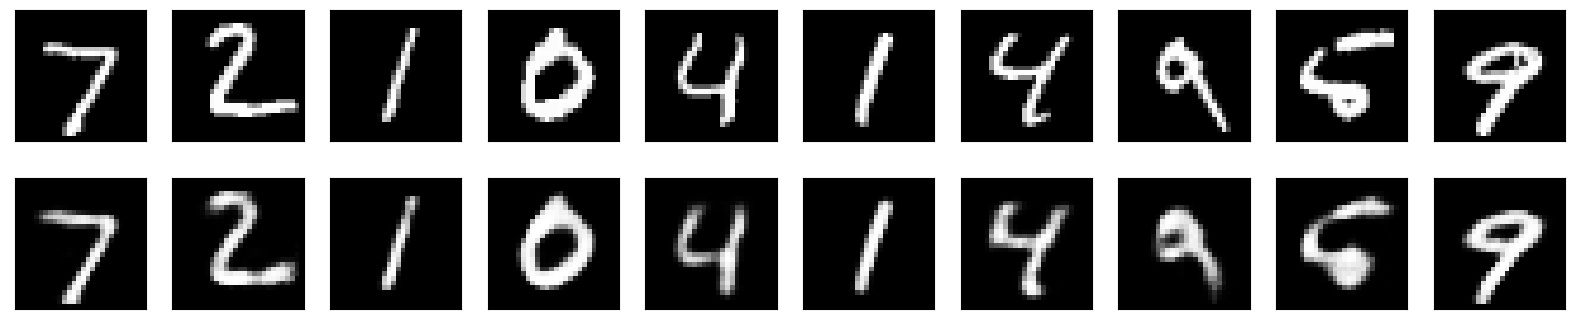


Experiment: Dense Autoencoder - Hidden Layers: [128, 64], Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.1971 - val_loss: 0.1358
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1262 - val_loss: 0.1159
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1120 - val_loss: 0.1062
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1049 - val_loss: 0.1008
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1006 - val_loss: 0.0971
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0975 - val_loss: 0.0950
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0953 - val_loss: 0.0934
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0922 - val_loss: 0.0910
Epoch 10/10
313/3

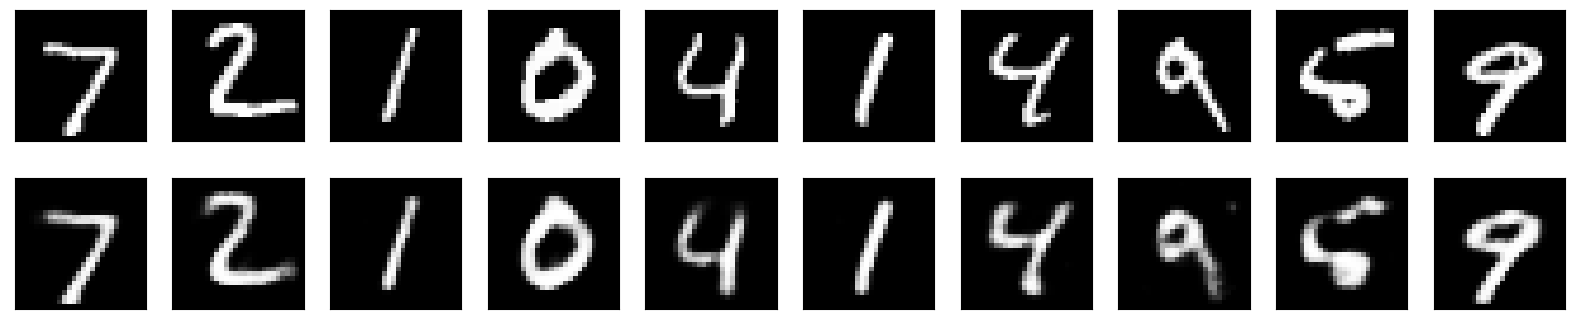


Experiment: Dense Autoencoder - Hidden Layers: [256, 128, 64], Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2028 - val_loss: 0.1454
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1369 - val_loss: 0.1280
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1256 - val_loss: 0.1207
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1191 - val_loss: 0.1156
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1154 - val_loss: 0.1126
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1129 - val_loss: 0.1111
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1111 - val_loss: 0.1097
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1097 - val_loss: 0.1083
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1085 - val_loss: 0.1074
Epoch 10/10


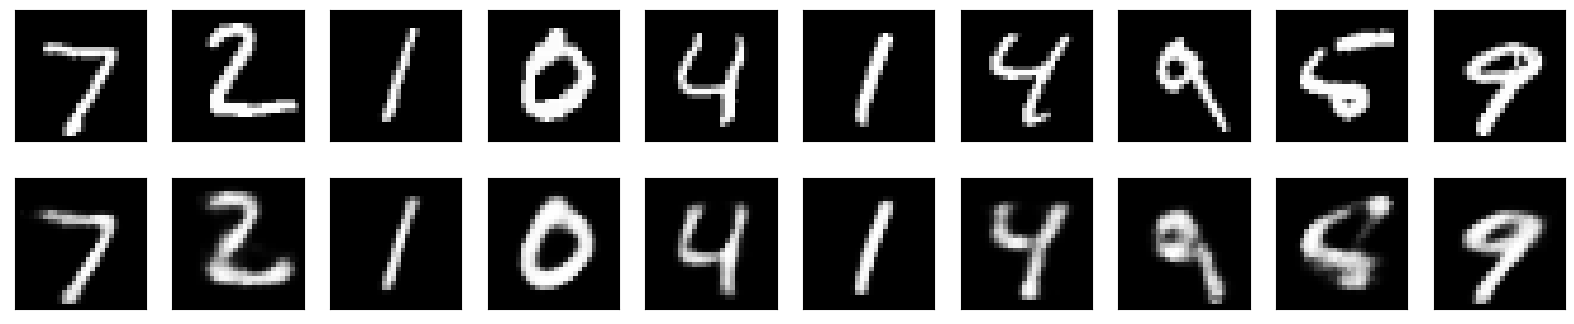


Experiment: Dense Autoencoder - Hidden Layers: [256, 128, 64], Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2009 - val_loss: 0.1402
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1306 - val_loss: 0.1216
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1172 - val_loss: 0.1114
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1098 - val_loss: 0.1062
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1048 - val_loss: 0.1021
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1015 - val_loss: 0.0996
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0989 - val_loss: 0.0971
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0969 - val_loss: 0.0961
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0951 - val_loss: 0.0937
Epoch 10/10


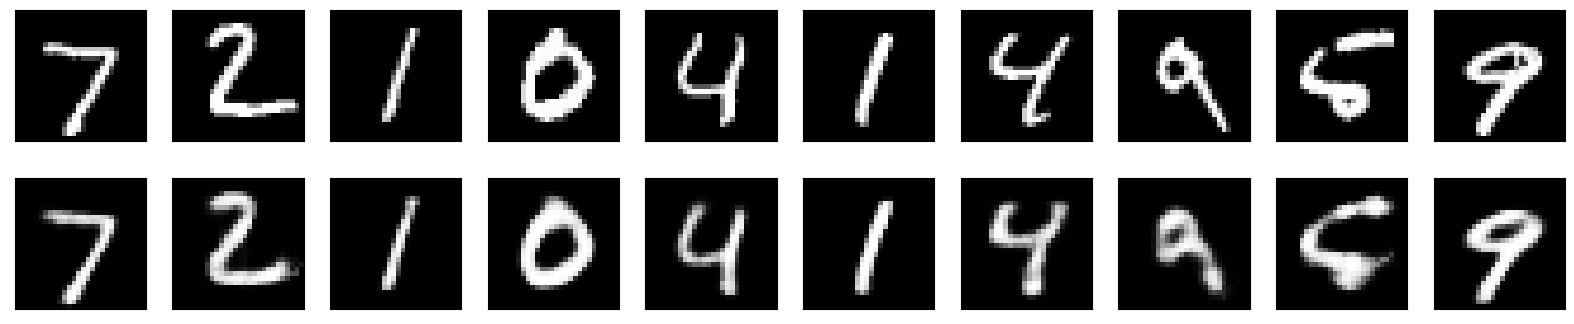


Experiment: Dense Autoencoder - Hidden Layers: [256, 128, 64], Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 8s 13ms/step - loss: 0.1977 - val_loss: 0.1377
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1256 - val_loss: 0.1146
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1112 - val_loss: 0.1060
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1039 - val_loss: 0.1002
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0993 - val_loss: 0.0962
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0961 - val_loss: 0.0942
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0936 - val_loss: 0.0917
Epoch 8/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0914 - val_loss: 0.0907
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0900 - val_loss: 0.0888
Epoch 10/10


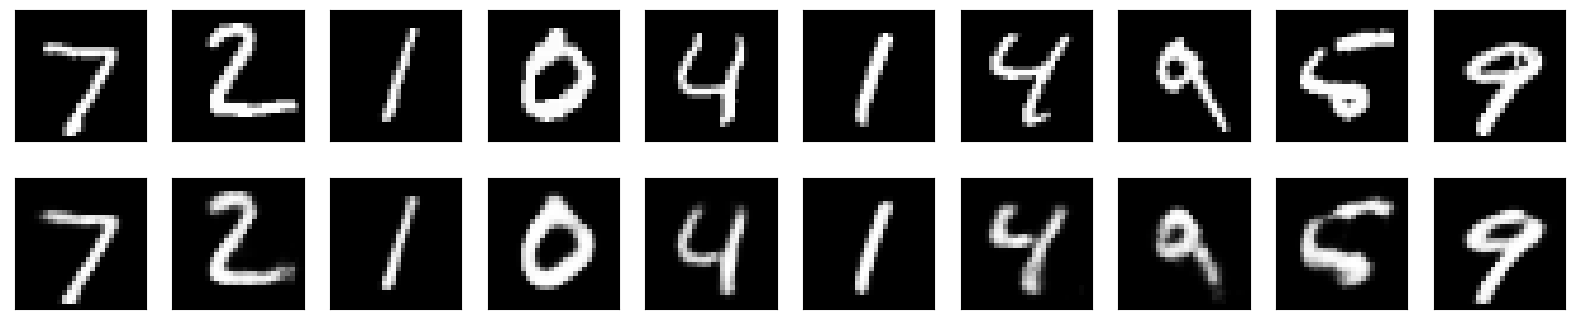


Experiment: Dense Autoencoder - Hidden Layers: [512, 256, 128], Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.1935 - val_loss: 0.1388
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1290 - val_loss: 0.1215
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1193 - val_loss: 0.1159
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1149 - val_loss: 0.1130
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1116 - val_loss: 0.1096
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1083 - val_loss: 0.1072
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1061 - val_loss: 0.1061
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1044 - val_loss: 0.1044
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1031 - val_loss: 0.1037
Epoch 10/1

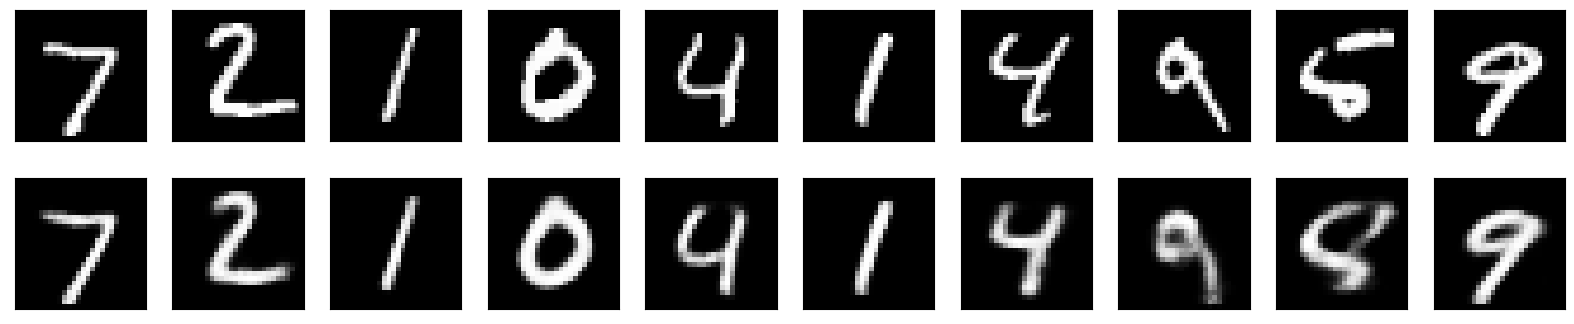


Experiment: Dense Autoencoder - Hidden Layers: [512, 256, 128], Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 11s 19ms/step - loss: 0.1803 - val_loss: 0.1258
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1163 - val_loss: 0.1087
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1034 - val_loss: 0.0991
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0973 - val_loss: 0.0950
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0932 - val_loss: 0.0913
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0904 - val_loss: 0.0891
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0884 - val_loss: 0.0871
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0869 - val_loss: 0.0863
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0856 - val_loss: 0.0847
Epoch 10/1

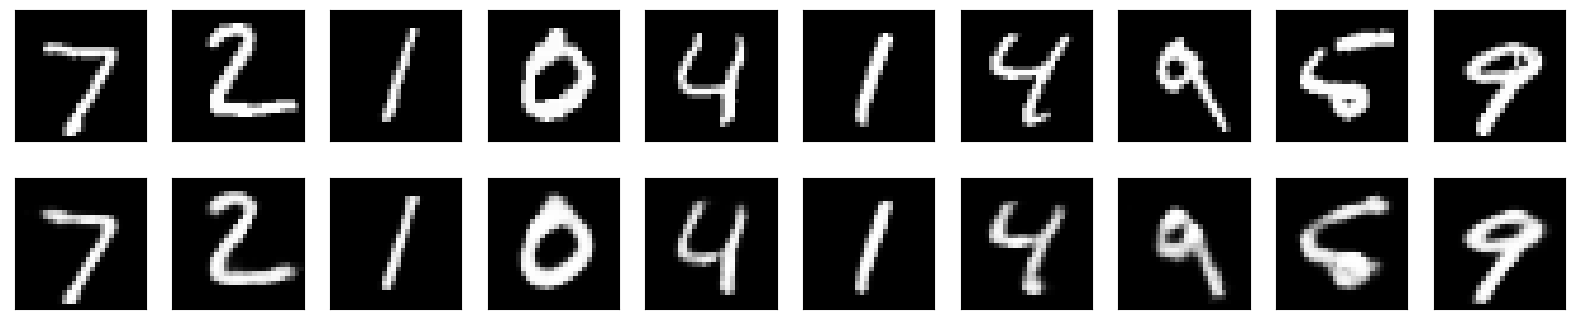


Experiment: Dense Autoencoder - Hidden Layers: [512, 256, 128], Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.1783 - val_loss: 0.1205
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1113 - val_loss: 0.1014
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0984 - val_loss: 0.0937
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0921 - val_loss: 0.0899
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0887 - val_loss: 0.0869
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0862 - val_loss: 0.0856
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0844 - val_loss: 0.0835
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0830 - val_loss: 0.0822
Epoch 9/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0819 - val_loss: 0.0815
Epoch 10/1

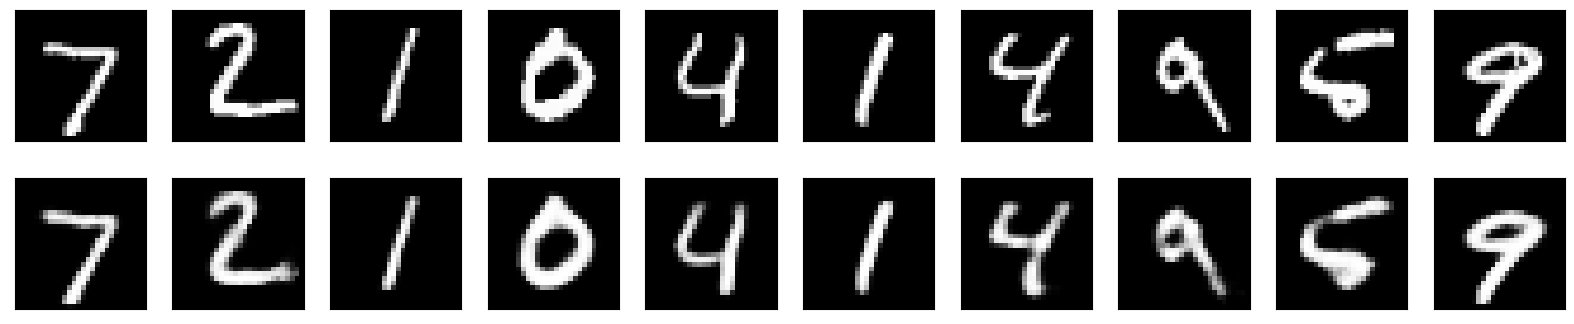

In [105]:
for hidden_layers in dense_hidden_layers_list:
    for latent_dim in latent_dim_list:
        print(f"\nExperiment: Dense Autoencoder - Hidden Layers: {hidden_layers}, Latent Dim: {latent_dim}")
        autoencoder_dense = create_dense_autoencoder(hidden_layers, latent_dim)
        generate_images(autoencoder_dense, x_test_flat, model_type='dense')

#### Experiment for CNN Autoencoder


Experiment: Conv Layers: 1, Filters: 32, Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.1693 - val_loss: 0.0937
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0889 - val_loss: 0.0835
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0827 - val_loss: 0.0803
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0799 - val_loss: 0.0783
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0782 - val_loss: 0.0767
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0769 - val_loss: 0.0756
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0761 - val_loss: 0.0754
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0753 - val_loss: 0.0746
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0747 - val_loss: 0.0744
Epoch 10/10
1/1 [=================

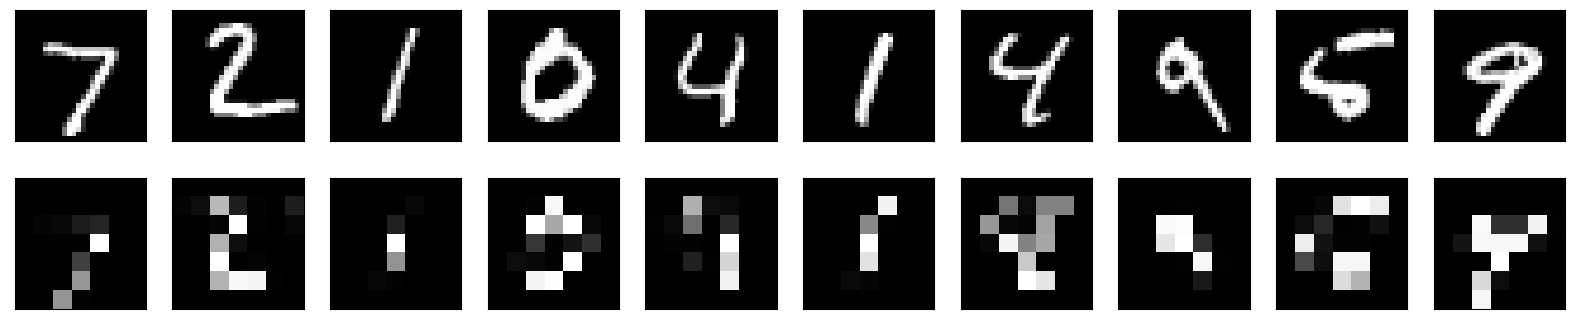


Experiment: Conv Layers: 1, Filters: 32, Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.1879 - val_loss: 0.1229
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1166 - val_loss: 0.1095
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1087 - val_loss: 0.1050
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1048 - val_loss: 0.1019
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1024 - val_loss: 0.1014
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1006 - val_loss: 0.0991
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0993 - val_loss: 0.0976
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0983 - val_loss: 0.0971
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0974 - val_loss: 0.0963
Epoch 10/10
1/1 [=================

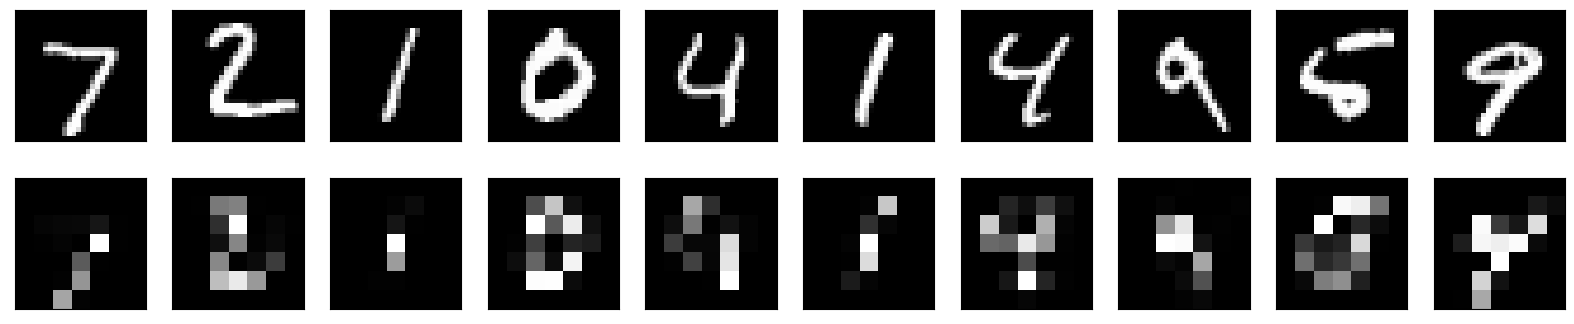


Experiment: Conv Layers: 1, Filters: 32, Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.1355 - val_loss: 0.0701
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0675 - val_loss: 0.0649
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0647 - val_loss: 0.0637
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0637 - val_loss: 0.0629
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0631 - val_loss: 0.0626
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0627 - val_loss: 0.0623
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0624 - val_loss: 0.0622
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0622 - val_loss: 0.0621
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0620 - val_loss: 0.0614
Epoch 10/10
1/1 [=================

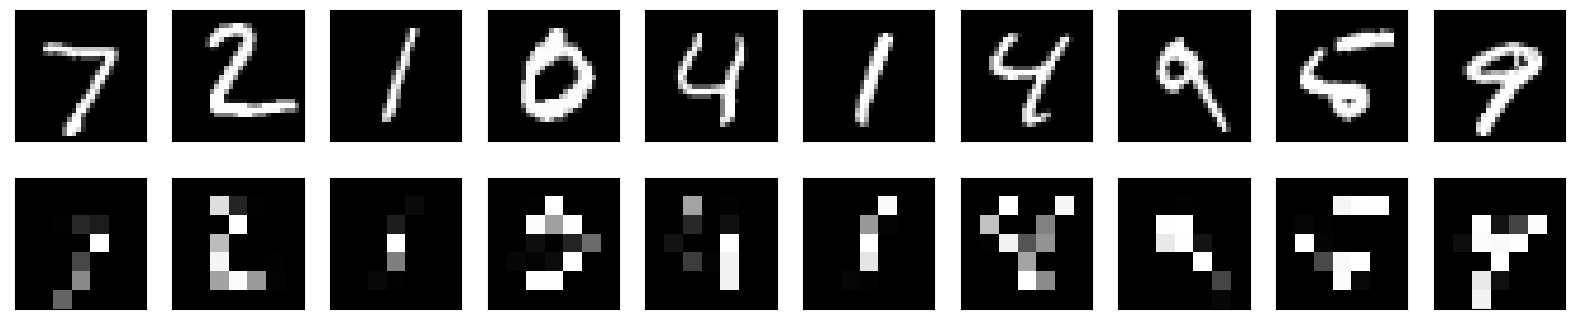


Experiment: Conv Layers: 1, Filters: 64, Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.2298 - val_loss: 0.1787
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1746 - val_loss: 0.1698
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1675 - val_loss: 0.1651
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1628 - val_loss: 0.1598
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1595 - val_loss: 0.1577
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1573 - val_loss: 0.1552
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1557 - val_loss: 0.1546
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1544 - val_loss: 0.1535
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1535 - val_loss: 0.1530
Epoch 10/10
1/1 [================

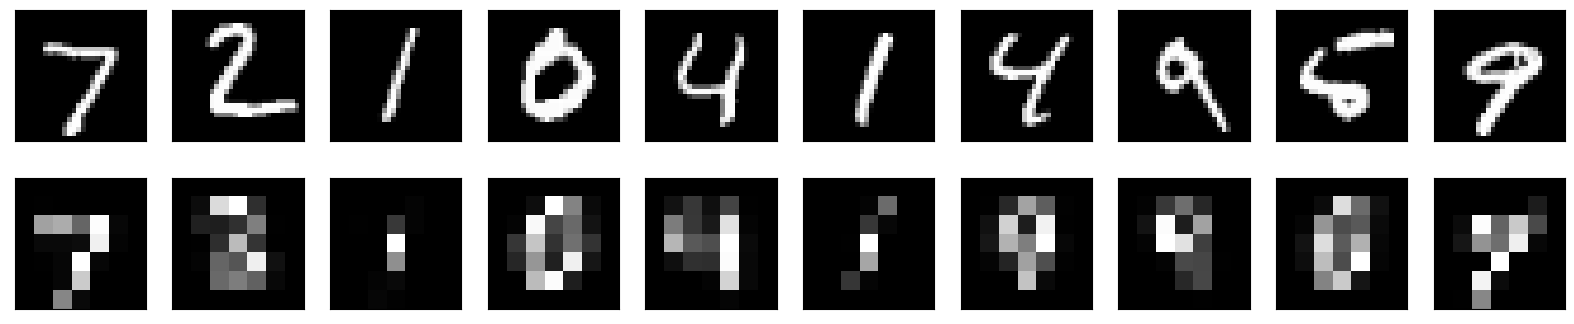


Experiment: Conv Layers: 1, Filters: 64, Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.1627 - val_loss: 0.0968
Epoch 2/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0922 - val_loss: 0.0870
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0862 - val_loss: 0.0843
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0830 - val_loss: 0.0814
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0812 - val_loss: 0.0808
Epoch 6/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0797 - val_loss: 0.0787
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0786 - val_loss: 0.0777
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0776 - val_loss: 0.0769
Epoch 9/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0769 - val_loss: 0.0765
Epoch 10/10
1/1 [================

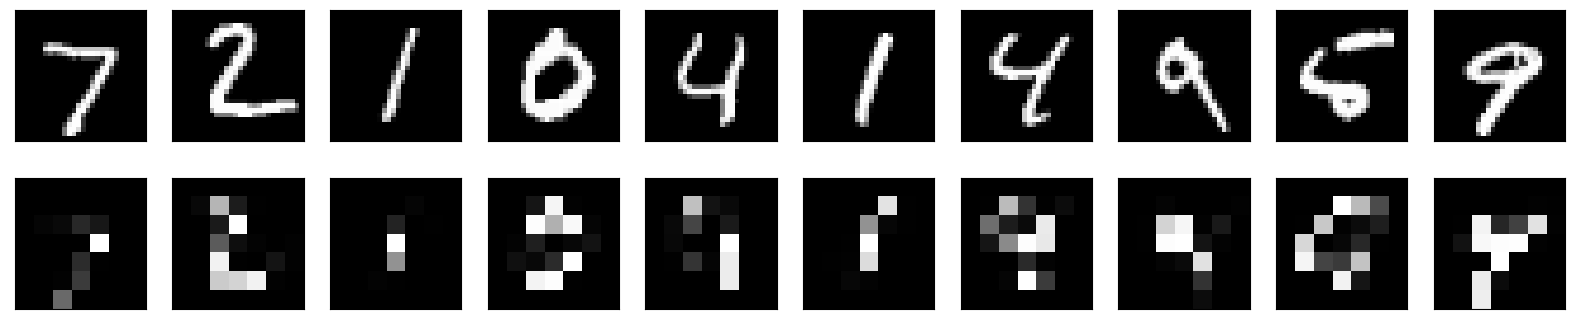


Experiment: Conv Layers: 1, Filters: 64, Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1221 - val_loss: 0.0681
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0660 - val_loss: 0.0639
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0639 - val_loss: 0.0629
Epoch 4/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0631 - val_loss: 0.0624
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0626 - val_loss: 0.0620
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0623 - val_loss: 0.0620
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0621 - val_loss: 0.0615
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0618 - val_loss: 0.0615
Epoch 9/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0616 - val_loss: 0.0610
Epoch 10/10
1/1 [========

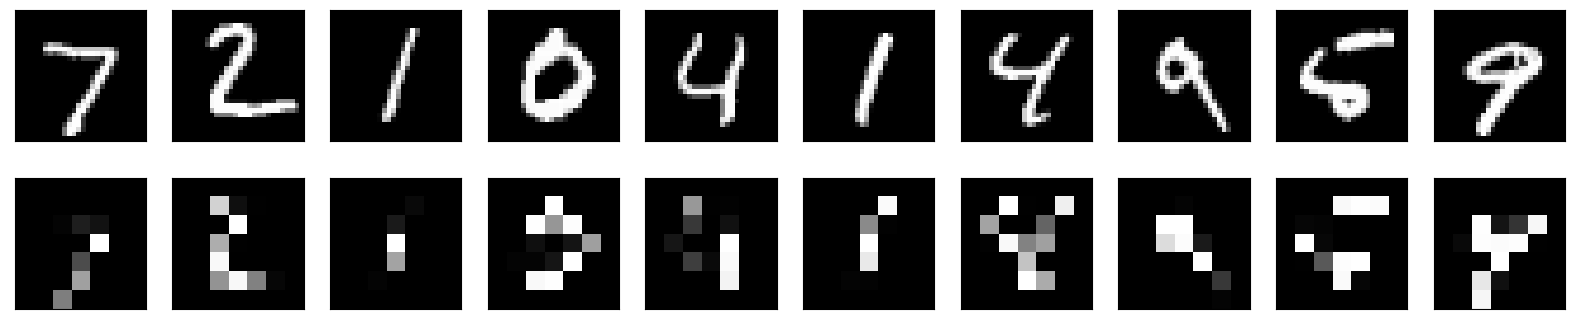


Experiment: Conv Layers: 1, Filters: 128, Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 21s 42ms/step - loss: 0.1626 - val_loss: 0.1073
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 0.1034 - val_loss: 0.0973
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0972 - val_loss: 0.0949
Epoch 4/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0940 - val_loss: 0.0924
Epoch 5/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0919 - val_loss: 0.0898
Epoch 6/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0903 - val_loss: 0.0882
Epoch 7/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0891 - val_loss: 0.0881
Epoch 8/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0881 - val_loss: 0.0873
Epoch 9/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0872 - val_loss: 0.0867
Epoch 10/10
1/1 [=======

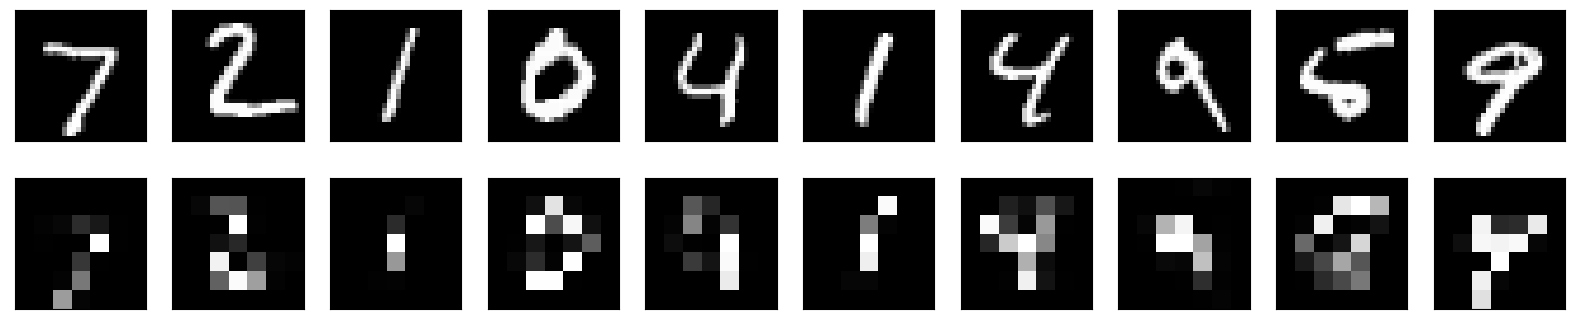


Experiment: Conv Layers: 1, Filters: 128, Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 23s 46ms/step - loss: 0.1292 - val_loss: 0.0712
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0690 - val_loss: 0.0667
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0666 - val_loss: 0.0656
Epoch 4/10
469/469 [==============================] - 19s 42ms/step - loss: 0.0654 - val_loss: 0.0644
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0647 - val_loss: 0.0641
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0641 - val_loss: 0.0635
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0636 - val_loss: 0.0629
Epoch 8/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0632 - val_loss: 0.0627
Epoch 9/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0629 - val_loss: 0.0625
Epoch 10/10
1/1 [=======

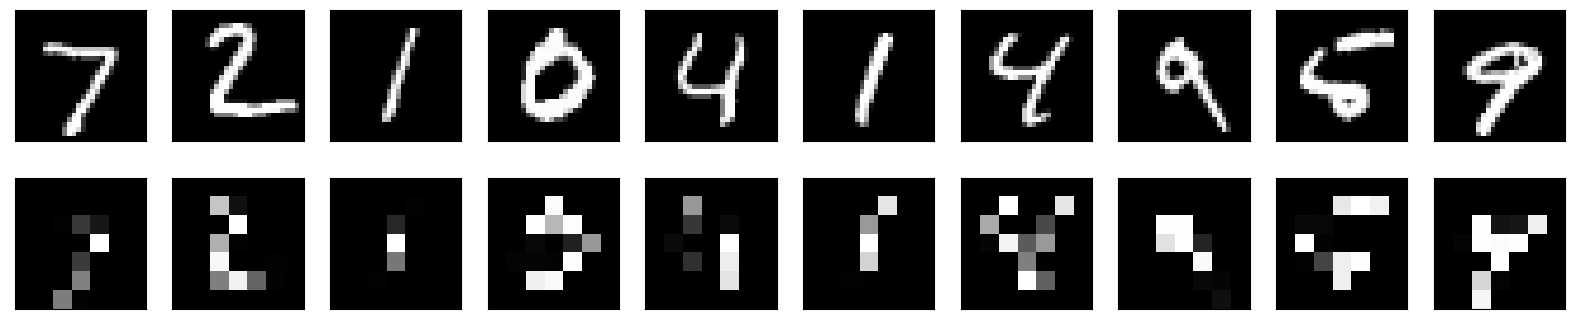


Experiment: Conv Layers: 1, Filters: 128, Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 0.1087 - val_loss: 0.0659
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0646 - val_loss: 0.0633
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0631 - val_loss: 0.0622
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0625 - val_loss: 0.0620
Epoch 5/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0620 - val_loss: 0.0612
Epoch 6/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0616 - val_loss: 0.0613
Epoch 7/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0613 - val_loss: 0.0612
Epoch 8/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0610 - val_loss: 0.0605
Epoch 9/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0608 - val_loss: 0.0604
Epoch 10/10
1/1 [=======

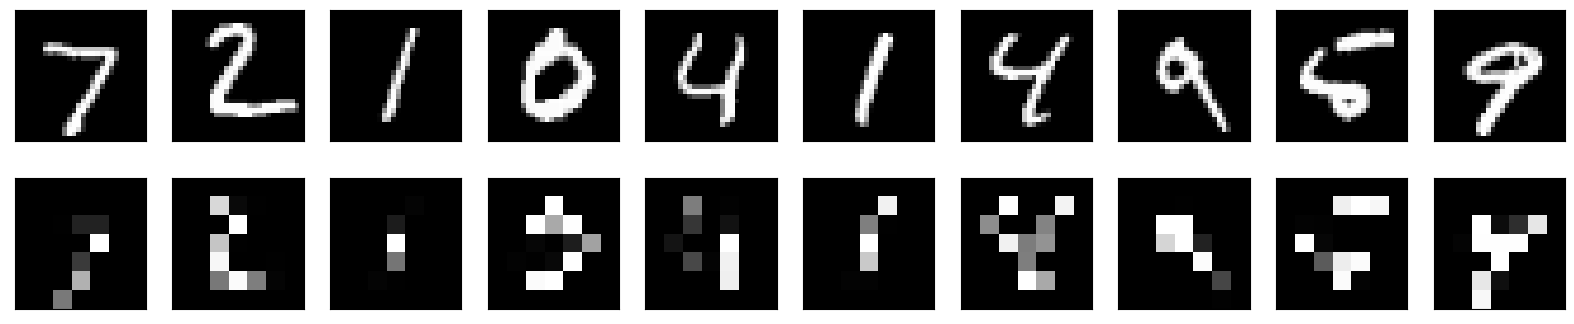


Experiment: Conv Layers: 2, Filters: 32, Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 16s 32ms/step - loss: 0.1895 - val_loss: 0.1299
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1248 - val_loss: 0.1193
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1174 - val_loss: 0.1142
Epoch 4/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1132 - val_loss: 0.1100
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1105 - val_loss: 0.1078
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1085 - val_loss: 0.1064
Epoch 7/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1070 - val_loss: 0.1052
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1057 - val_loss: 0.1041
Epoch 9/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1047 - val_loss: 0.1033
Epoch 10/10
1/1 [========

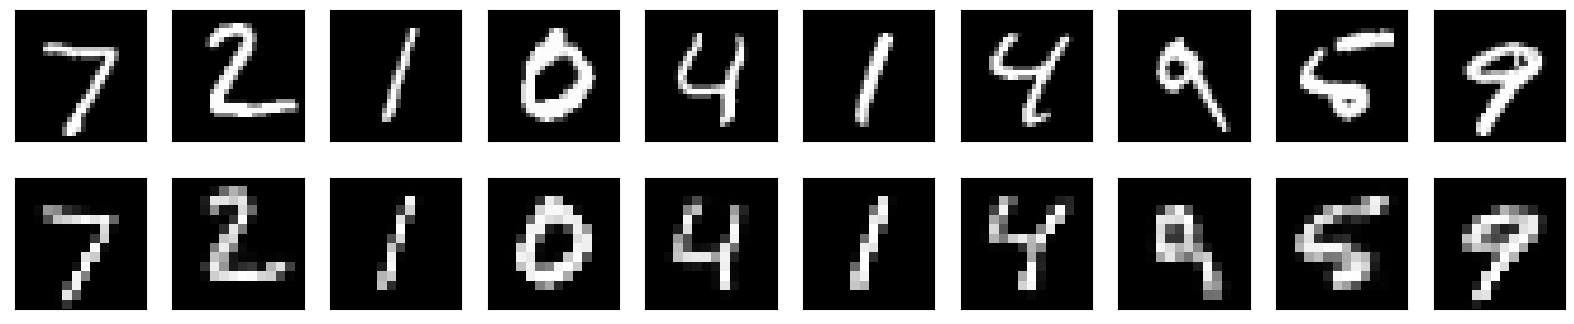


Experiment: Conv Layers: 2, Filters: 32, Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 17s 33ms/step - loss: 0.1858 - val_loss: 0.1157
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1084 - val_loss: 0.1011
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0992 - val_loss: 0.0955
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0952 - val_loss: 0.0924
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0927 - val_loss: 0.0906
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0908 - val_loss: 0.0889
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0895 - val_loss: 0.0877
Epoch 8/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0884 - val_loss: 0.0869
Epoch 9/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0875 - val_loss: 0.0864
Epoch 10/10
1/1 [========

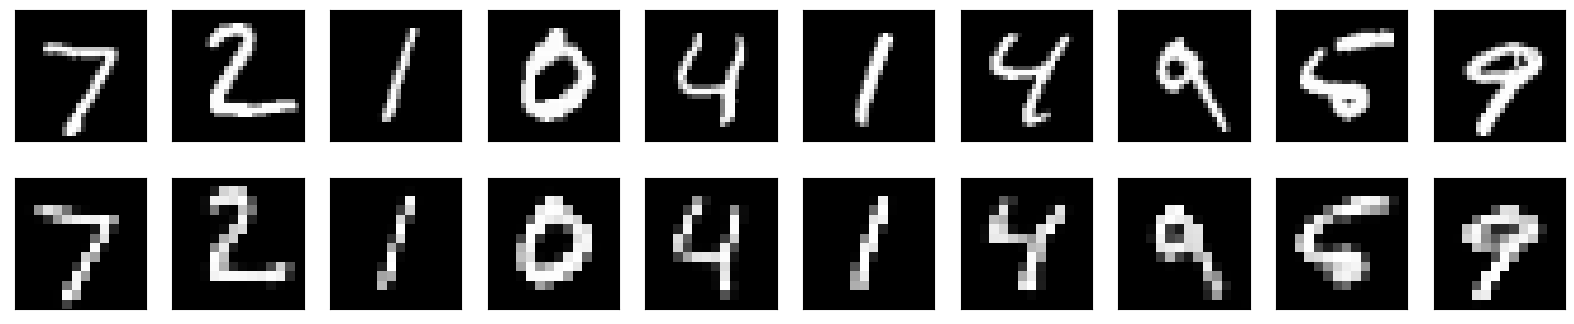


Experiment: Conv Layers: 2, Filters: 32, Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 17s 34ms/step - loss: 0.1619 - val_loss: 0.1026
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0961 - val_loss: 0.0892
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0872 - val_loss: 0.0833
Epoch 4/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0827 - val_loss: 0.0802
Epoch 5/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0800 - val_loss: 0.0784
Epoch 6/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0782 - val_loss: 0.0767
Epoch 7/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0768 - val_loss: 0.0753
Epoch 8/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0757 - val_loss: 0.0744
Epoch 9/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0747 - val_loss: 0.0733
Epoch 10/10
1/1 [========

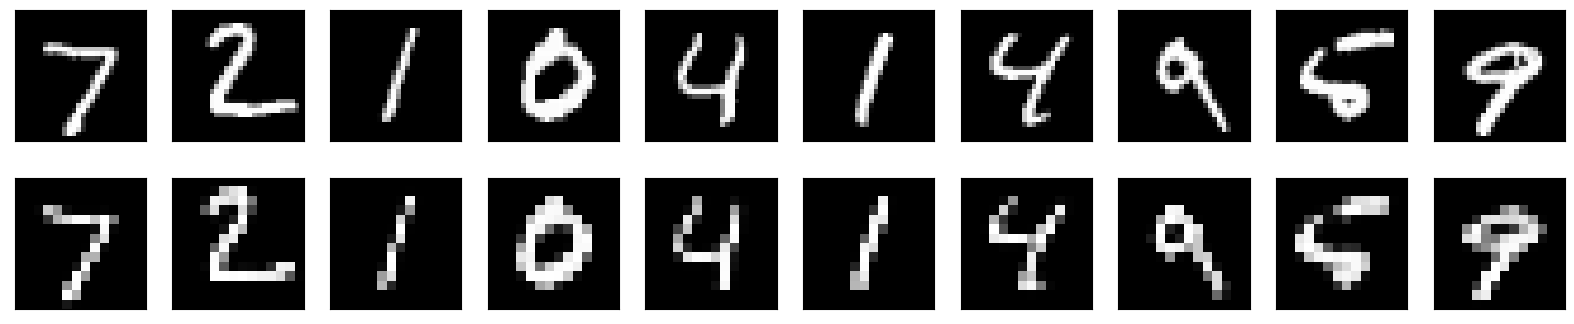


Experiment: Conv Layers: 2, Filters: 64, Latent Dim: 16
Epoch 1/10
469/469 [==============================] - 37s 77ms/step - loss: 0.1892 - val_loss: 0.1341
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.1305 - val_loss: 0.1244
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.1233 - val_loss: 0.1189
Epoch 4/10
469/469 [==============================] - 36s 76ms/step - loss: 0.1194 - val_loss: 0.1166
Epoch 5/10
469/469 [==============================] - 35s 75ms/step - loss: 0.1171 - val_loss: 0.1146
Epoch 6/10
469/469 [==============================] - 36s 76ms/step - loss: 0.1153 - val_loss: 0.1132
Epoch 7/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1138 - val_loss: 0.1124
Epoch 8/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1126 - val_loss: 0.1113
Epoch 9/10
469/469 [==============================] - 36s 76ms/step - loss: 0.1115 - val_loss: 0.1106
Epoch 10/10
1/1 [========

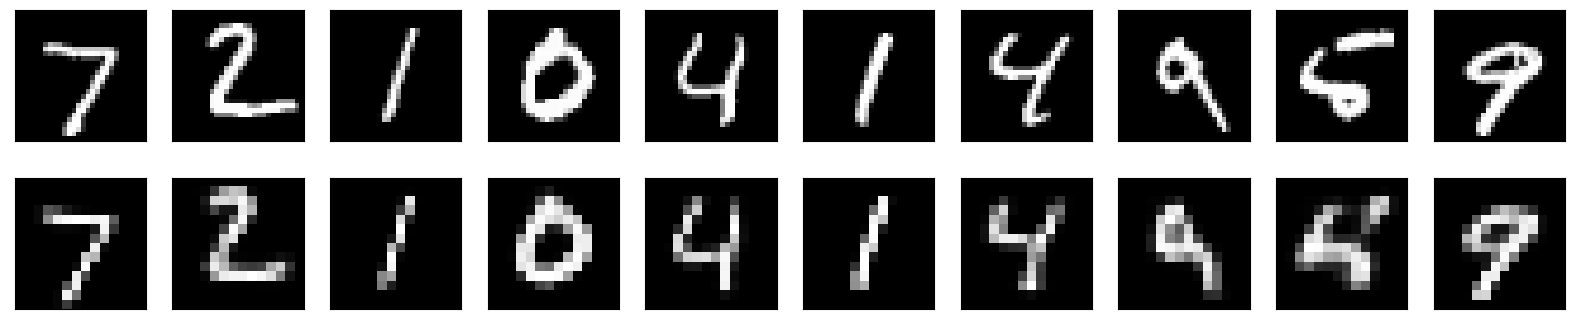


Experiment: Conv Layers: 2, Filters: 64, Latent Dim: 32
Epoch 1/10
469/469 [==============================] - 39s 80ms/step - loss: 0.2045 - val_loss: 0.1476
Epoch 2/10
469/469 [==============================] - 42s 89ms/step - loss: 0.1426 - val_loss: 0.1380
Epoch 3/10
469/469 [==============================] - 59s 126ms/step - loss: 0.1367 - val_loss: 0.1332
Epoch 4/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1333 - val_loss: 0.1305
Epoch 5/10
469/469 [==============================] - 55s 116ms/step - loss: 0.1307 - val_loss: 0.1284
Epoch 6/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1289 - val_loss: 0.1268
Epoch 7/10
469/469 [==============================] - 54s 115ms/step - loss: 0.1274 - val_loss: 0.1262
Epoch 8/10
469/469 [==============================] - 53s 114ms/step - loss: 0.1260 - val_loss: 0.1247
Epoch 9/10
469/469 [==============================] - 54s 116ms/step - loss: 0.1249 - val_loss: 0.1238
Epoch 10/10
1/1 [=

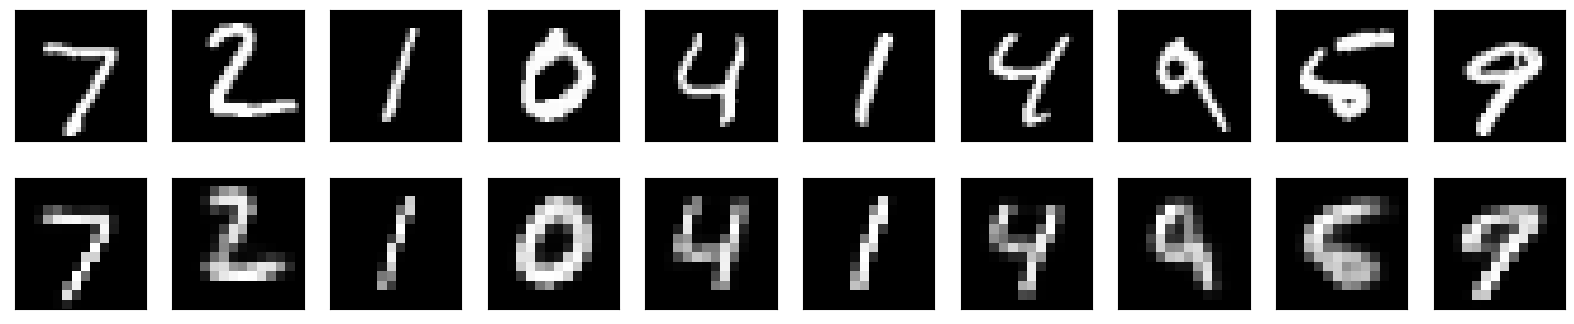


Experiment: Conv Layers: 2, Filters: 64, Latent Dim: 64
Epoch 1/10
469/469 [==============================] - 60s 120ms/step - loss: 0.1555 - val_loss: 0.0970
Epoch 2/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0908 - val_loss: 0.0849
Epoch 3/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0827 - val_loss: 0.0796
Epoch 4/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0790 - val_loss: 0.0768
Epoch 5/10
469/469 [==============================] - 69s 148ms/step - loss: 0.0766 - val_loss: 0.0748
Epoch 6/10
469/469 [==============================] - 67s 144ms/step - loss: 0.0749 - val_loss: 0.0732
Epoch 7/10
469/469 [==============================] - 69s 147ms/step - loss: 0.0736 - val_loss: 0.0727
Epoch 8/10
469/469 [==============================] - 68s 146ms/step - loss: 0.0727 - val_loss: 0.0716
Epoch 9/10
469/469 [==============================] - 68s 145ms/step - loss: 0.0720 - val_loss: 0.0714
Epoch 10/10
1/1 

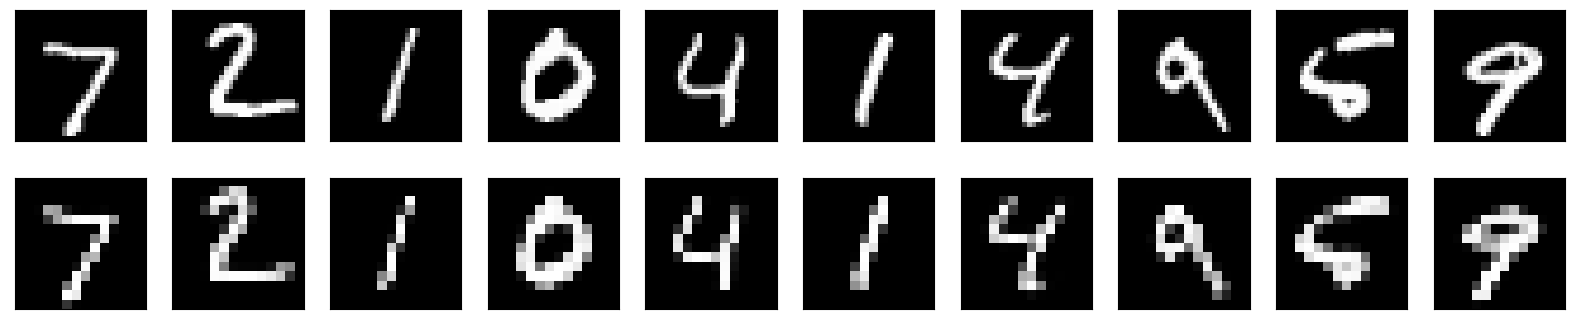


Experiment: Conv Layers: 2, Filters: 128, Latent Dim: 16
Epoch 1/10
 29/469 [>.............................] - ETA: 2:56 - loss: 0.3897

In [ ]:
for num_conv_layers in num_conv_layers_list:
    for filters in filters_list:
        for latent_dim in latent_dim_list:
            print(f"\nExperiment: Conv Layers: {num_conv_layers}, Filters: {filters}, Latent Dim: {latent_dim}")
            autoencoder = create_autoencoder_conv(num_conv_layers, filters, latent_dim)
            generate_images(autoencoder, x_test[:10], model_type='conv')

## Conclusion

### Neural Network:

<b>Number of Hidden Layers:</b>
Increasing the number of hidden layers captures more complex features.
It could also lead to overfitting. So we must balance the model's complexity

<b>Number of Nodes per Layer:</b>
Adding more nodes captures finer details but risks overfitting.
Hence Find an optimal balance between expressive power and generalization is important.

<b>Latent Space Vector Size:</b>
A larger latent space captures more information, but it could also lead to increased computational complexity. Therefore we must evaluate the impact on image quality and computational efficiency.

### Convolutional Neural Network:

<b>Number of Convolutional Layers:</b>
More layers captures hierarchical features, but deeper networks may require more data and training time. Its essential to assess the quality of reconstructed images and computational demands.

<b>Number of Filters:</b>
More filters captures diverse features, but there is a computational cost. Hece, we should evaluate the trade-off between feature richness and computational efficiency.

<b>Latent Space Vector Size:</b>
A larger latent space seems to capture more details, but it can also increase the model's complexity. Considering the impact on image quality and the interpretability of the latent space is necessary to prevent it.